<a href="https://colab.research.google.com/github/fbeilstein/presentations/blob/master/presentation_for_October_31_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title ##Back propagation (how to get gradient)

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_1.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_2.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_3.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_4.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_5.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_6.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_7.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_8.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_9.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_10.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_11.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_12.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_13.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_14.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_15.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_16.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_17.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_18.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_19.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_20.jpg" width="750px">
`
  ]
)
</script>

In [2]:
#@title  ##Single neuron operation

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/forward.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/backward.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/backward_two_outs.jpg" width="750px">`
  ]
)
</script>

In [3]:
#@title ##NN example

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_1.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_2.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_3.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_4.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_5.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_6.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_7.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_8.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_9.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_10.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_11.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_12.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_13.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_14.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_15.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_16.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_17.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_18.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_19.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_20.jpg" width="750px">`
  ]
)
</script>

# Example SimpleRandomNet

In [ ]:
!pip install keras

((1347, 8, 8, 1), (1347, 10))

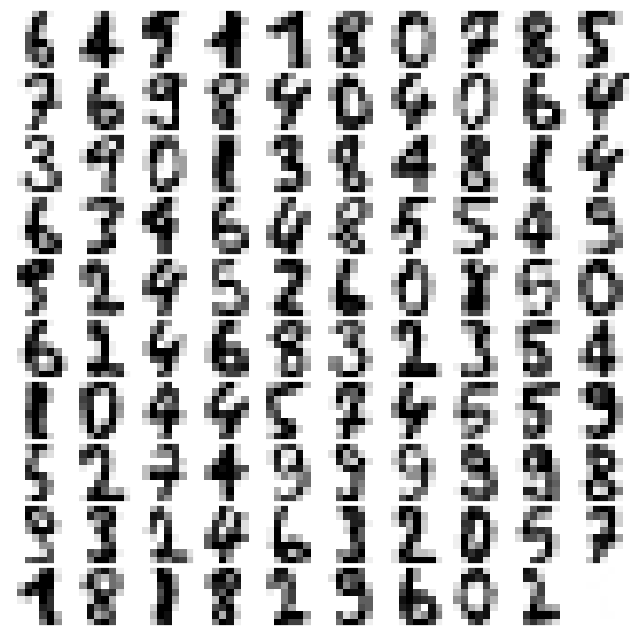

In [31]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()
X_all = digits.data.reshape(digits.data.shape[0], 8, 8, 1).astype(float) / 256.0

X_train, X_test, y_train, y_test =  train_test_split(X_all,
                                                     digits.target,
                                                     train_size=0.75,
                                                     shuffle=True)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

def plot_digits(data):
  fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(hspace=0.05, wspace=0.05)
  for i, axi in enumerate(ax.flat):
    im = axi.imshow(data[i,:,:,0], cmap='binary')
  im.set_clim(0, 16)

plot_digits(X_train)
X_train.shape, y_train.shape

In [16]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Input

class RandNet(Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()
    self.add(Input(input_shape))
    self.add(Conv2D(6, kernel_size=(3, 3), strides=(1, 1),
                    activation='tanh',
                    padding="same"))
    self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    self.add(Flatten())
    self.add(Dense(nb_classes, activation='softmax'))

    self.compile(optimizer='adam',
                loss=categorical_crossentropy,
                metrics=['accuracy'])

model = RandNet(X_train[0].shape, 10)
model.summary()

Model: "rand_net_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 6)             │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 4, 4, 6)             │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,030 (4.02 KB)

 Trainable params: 1,030 (4.02 KB)

 Non-trainable params: 0 (0.00 B)

**Categorical cross-entropy** loss function $L$ is computed as follows
$$
L = \sum_i t_i \ln(s_i),
$$
where $t_i$ are truth values and $s_i$ are **softmax** outputs
$$
\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \text{ for } i = 1, \dotsc, K \text{ and } \mathbf{z} = (z_1, \dotsc, z_K) \in \mathbb{R}^K.
$$
In our case $t_i$ are either $0$ or $1$ (see `to_categorical` function). We may have used `sparse_crossentropy`, same function different class encoding.

In [ ]:
model.fit(X_train, y=y_train,
          epochs=400,
          validation_data=(X_test, y_test),
          verbose=1)

In [22]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_test, axis=1), #true
                 np.argmax(model.predict(X_test), axis=1)   #predicted
                )

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[43,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 41,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 43,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  0,  0, 36,  1,  1],
       [ 0,  1,  0,  1,  0,  1,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 41]])

In [23]:
input = X_test
idx = 0

import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

conv_outs = K.function(inputs=model.input,
                       outputs=model.layers[0].output)(input)
pool_outs = K.function(inputs=model.input,
                       outputs=model.layers[1].output)(input)
model_outs = model.predict(input)


print("INPUT:")
fig, ax = plt.subplots(1, 1, figsize=(1, 1), subplot_kw=dict(xticks=[], yticks=[]))
ax.imshow(input[idx], cmap='binary')
plt.show()

print('CONVOLUTION:')
fig, ax = plt.subplots(1, 6, figsize=(6, 1), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
  axi.imshow(conv_outs[idx, :, :, i], cmap='binary')
plt.show()

print('AVERAGE POOL:')
fig, ax = plt.subplots(1, 6, figsize=(6, 1), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
  axi.imshow(pool_outs[idx, :, :, i], cmap='binary')
plt.show()

print('OUTPUT:')
print(model_outs[idx]);

AttributeError: module 'tensorflow.keras.backend' has no attribute 'function'

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RandNet(nn.Module):
    def __init__(self, input_shape, nb_classes):
        super(RandNet, self).__init__()
        self.conv = nn.Conv2d(in_channels=input_shape[0], out_channels=6, kernel_size=3, padding=1)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(6 * (input_shape[1] // 2) * (input_shape[2] // 2), nb_classes)  # Assuming 2D input shape

    def forward(self, x):
        conv_out = torch.tanh(self.conv(x))
        pool_out = self.pool(conv_out)
        flat_out = self.flatten(pool_out)
        out = F.softmax(self.fc(flat_out), dim=1)
        return conv_out, pool_out, flat_out, out

model = RandNet(X_train[0].shape, 10)
model.summary()

/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


AttributeError: 'RandNet' object has no attribute 'summary'

In [ ]:
model.fit(X_train, y=y_train,
          epochs=400,
          validation_data=(X_test, y_test),
          verbose=1)

In [ ]:


# Get intermediate outputs
conv_out, pool_out, flat_out, model_out = model(X_train)

print("Convolution Output:", conv_out.shape)
print("Pooling Output:", pool_out.shape)
print("Flatten Output:", flat_out.shape)
print("Final Output:", model_out.shape)